### 1. html 파싱 예제

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [15]:
url = 'http://pythonscraping.com/pages/page1.html'

In [16]:
html = urlopen(url)

In [17]:
html

In [18]:
soup = BeautifulSoup(html, 'lxml')

In [19]:
soup

<html>
<head>
<title>A Useful Page</title>
</head>
<body>
<h1>An Interesting Title</h1>
<div>
Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.
</div>
</body>
</html>

In [22]:
soup.find('div').text

'\nLorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.\n'

In [23]:
soup.find('title').text
# soup.title

'A Useful Page'

### 2. Yes 24 수집 예제

In [2]:
url = 'http://www.yes24.com/Product/Goods/78145872'

In [3]:
from urllib.request import urlopen
html = urlopen(url)

In [4]:
html

In [5]:
from bs4 import BeautifulSoup
# soup = BeautifulSoup(r.text, 'lxml')
soup = BeautifulSoup(html, 'lxml')

<!DOCTYPE html>
<html lang="ko">
<head><link href="http://www.yes24.com/Product/Goods/78145872" rel="canonical"/>
<meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
<meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
<meta content="width=1170" name="viewport"/>
<title> 당신은 뇌를 고칠 수 있다 - YES24 </title>
<meta content="당신은 뇌를 고칠 수 있다 - YES24" name="title"/>
<meta content="톰 오브라이언|이시은" name="author"/>
<meta content="아침에 일어나면 안개가 낀 것처럼 머릿속이 멍하다면?활기찬 하루 대신 만성 피로가 가득한 하루를 보내고 있다면?30년 넘게 뇌 건강, 면역 질환을 연구해온 톰 브라이언 박사,그가 알려주는 1주일에 1시간만으로 건강한 뇌 만드는 방법! 머릿속에 안개가 낀 것처럼 흐릿하여 자주 집중력이 떨어지고 기억해야 할 사실을 잊어버리거나..." name="description"/>
<meta content="매주 1시간 투자하여 최상의 기억력, 생산성, 수면을 얻는 법, You Can Fix Your Brain: Just 1 Hour a Week to the Best Memory, Productivity, and Sleep You've Ever Had, 톰 오브라이언|이시은, 브론스테인, 9791135442414, 113544241X" name="keywords"/>
<!-- Facebook Interface -->
<meta content="당신은 뇌를 고칠 수 있다" property="og:title"/>
<meta content="book" property="og:type"/>
<meta content="
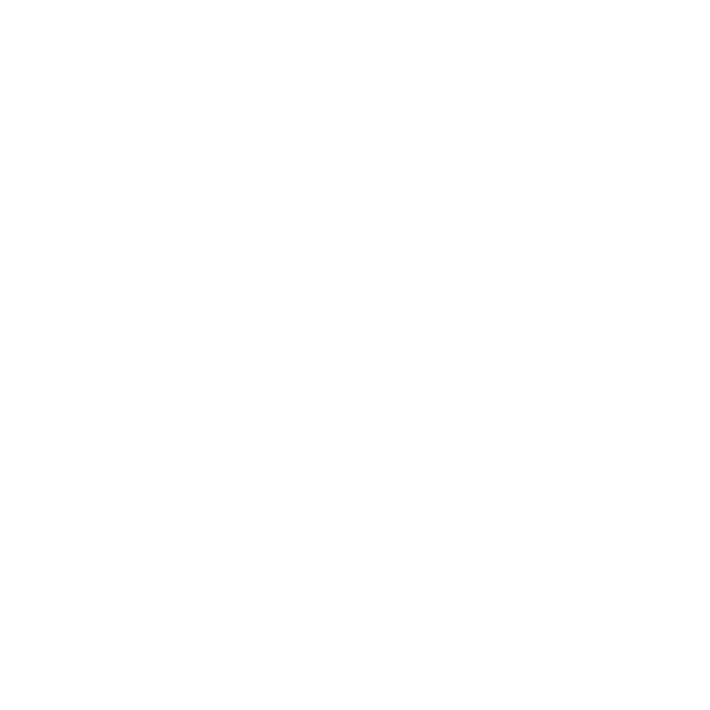
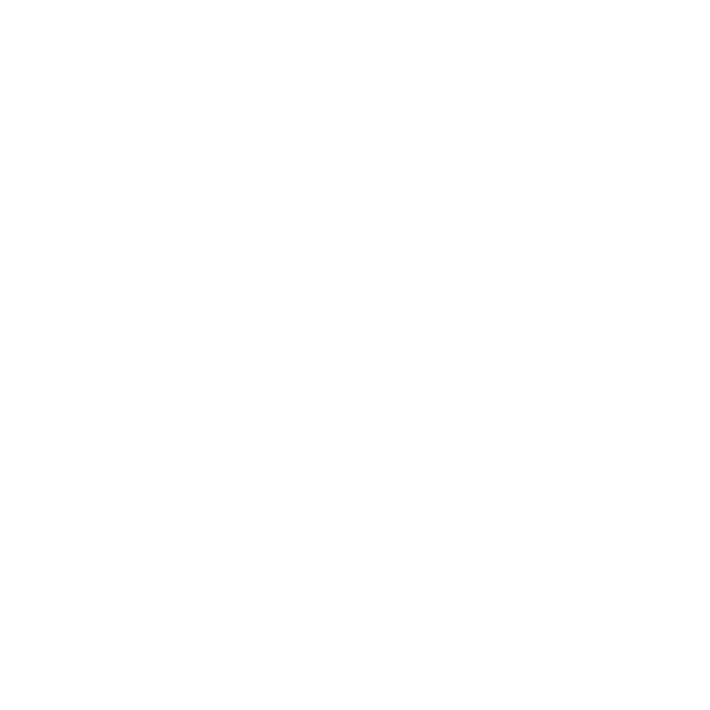
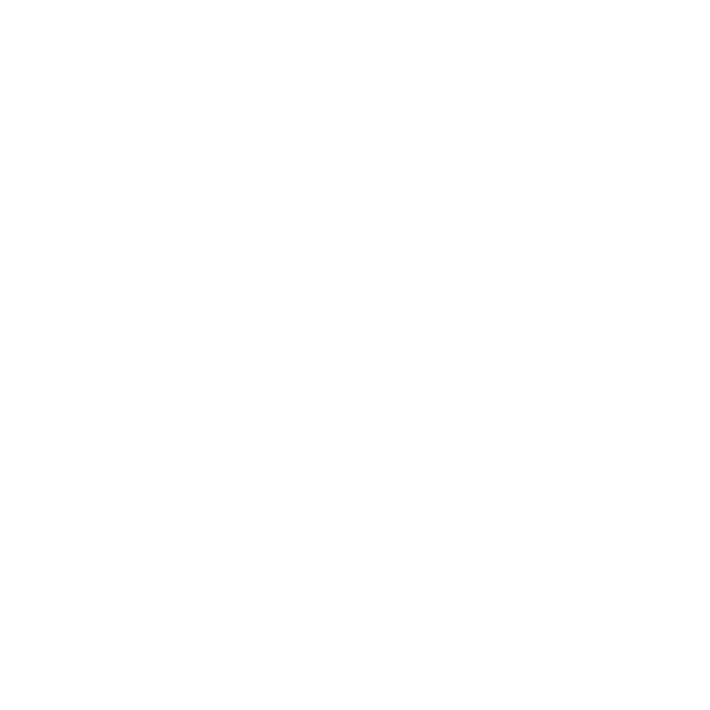
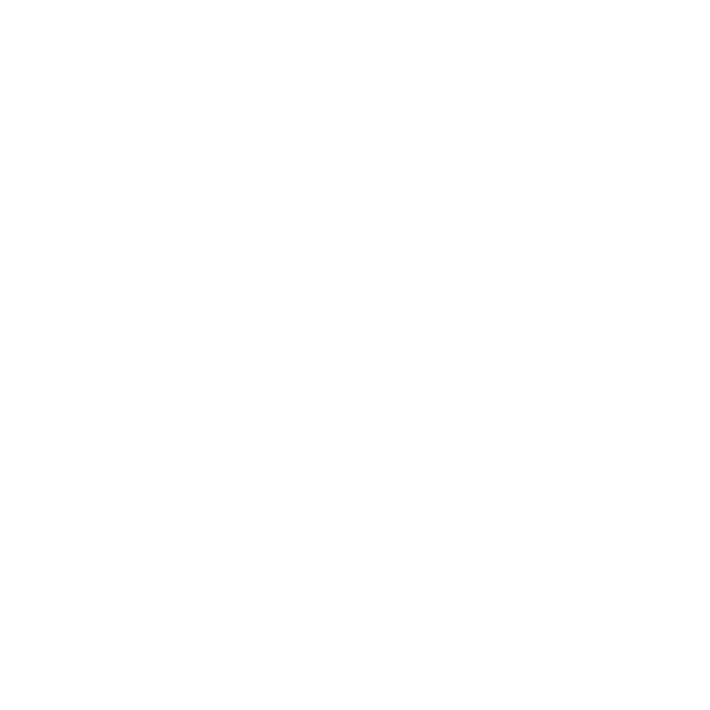
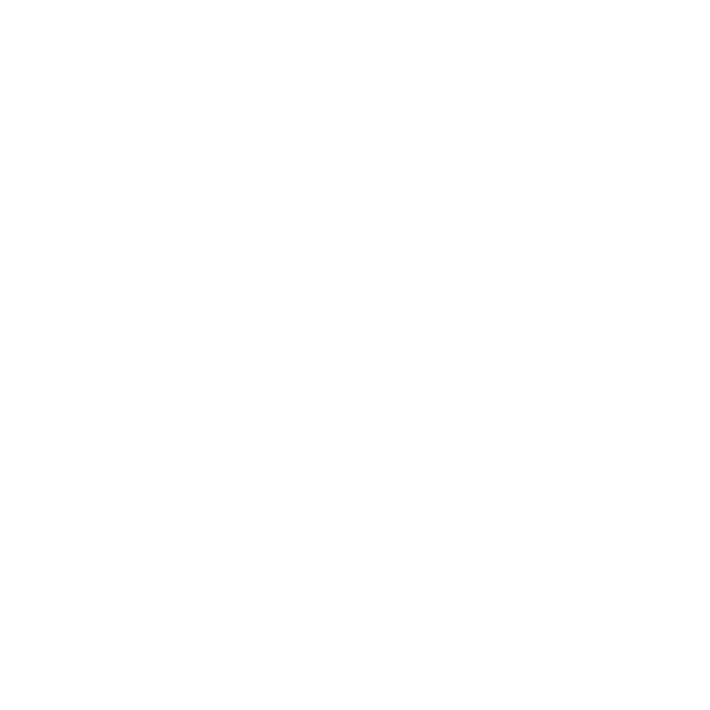
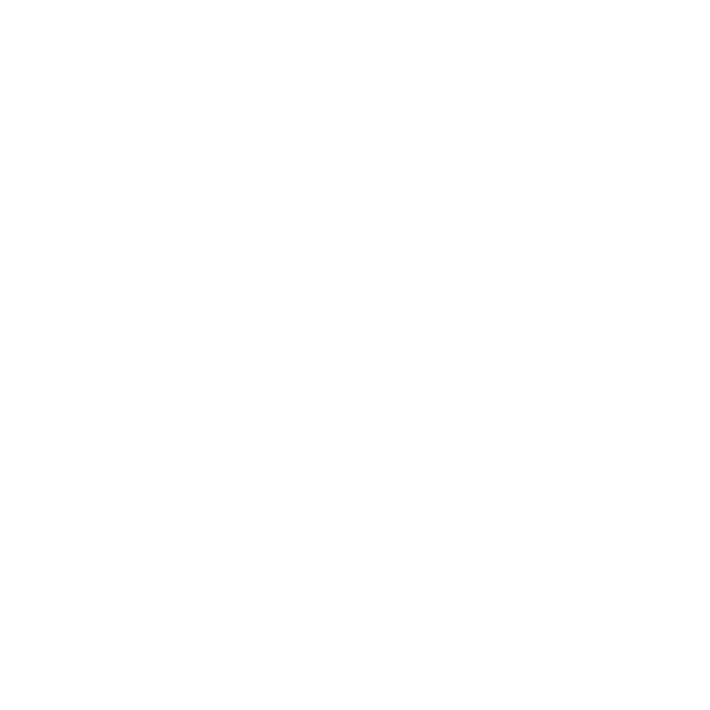
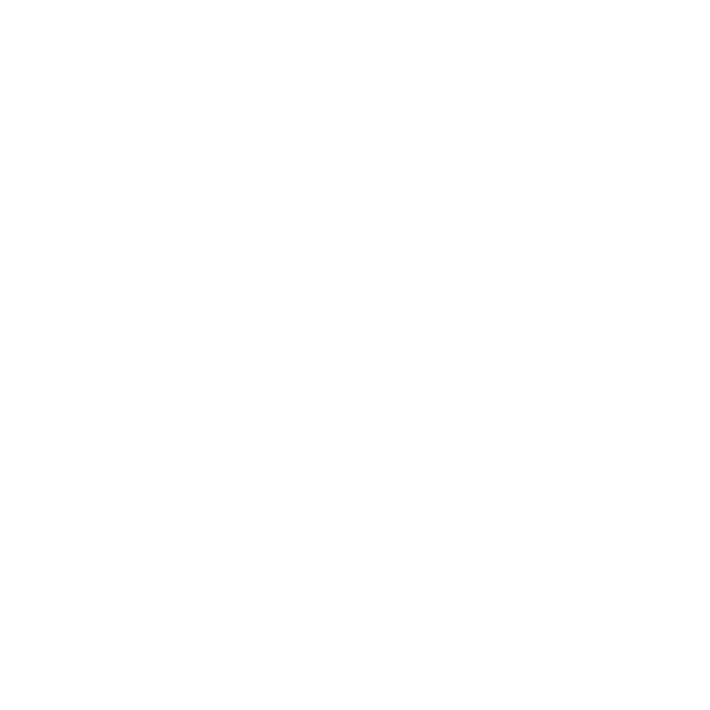
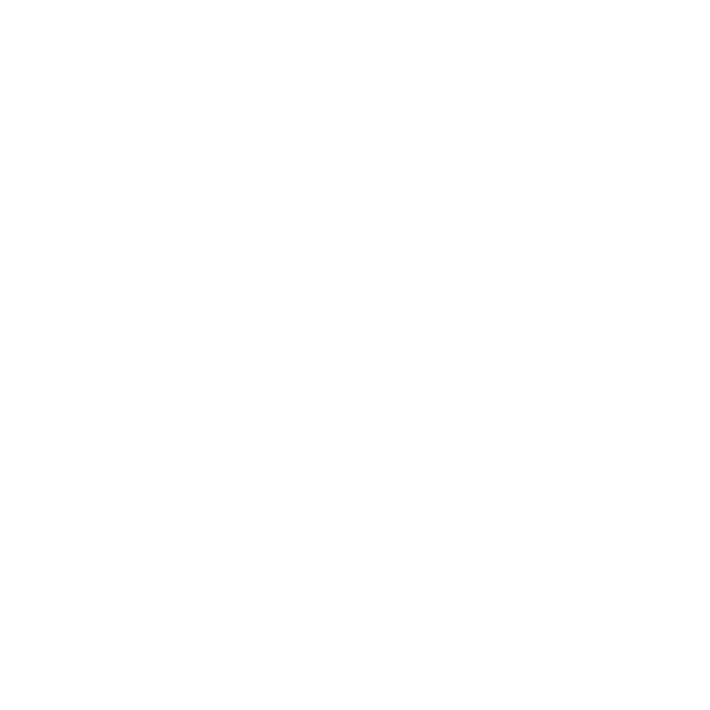

In [6]:
soup

In [11]:
soup.find('title').text.split('-')[0].strip()

'당신은 뇌를 고칠 수 있다'

In [12]:
soup.find('meta', attrs={'name':'author'})

<meta content="톰 오브라이언|이시은" name="author"/>

In [13]:
soup.find('meta', attrs={'name':'author'}).get('content')

'톰 오브라이언|이시은'

### 3. NAVER 뉴스 스크랩 함수 작성 예제

In [15]:
def get_article(url):
    
    # Obtain three types of information about a news article
#     r = requests.get(url)
    r = urlopen(url)
    soup = BeautifulSoup(r, 'lxml')
    news_title = soup.title.text
#     news_title = soup.find('title').text
    publisher = soup.find('meta', attrs={'name':'twitter:creator'}).get('content')
    news_content = soup.find('div', attrs = {'id':'articleBodyContents'}).text
    news_content = news_content.split('{}')[1].strip()
    
    return news_title, publisher, news_content

In [16]:
url = 'https://news.naver.com/main/read.nhn?oid=421&sid1=101&aid=0003525799&mid=shm&mode=LSD&nh=20180808204753'

title, publisher, content = get_article(url)

In [17]:
print(title)
print(publisher)
print(content)

국토부, BMW 운행중지명령 검토…발동시 14일 이후 적용(종합2보) : 네이버 뉴스
뉴스1
김현미 장관 "안전진단 미흡차량 운행중지명령 검토"  늑장리콜·차량결함 은폐축소 제작사 '퇴출' 경고© News1 방은영 디자이너(서울=뉴스1) 김희준 기자 = 정부가 안전진단을 못 받았거나 안전진단 결과 위험성이 있는 것으로 판단된 BMW 차량에 대해 운행정지명령을 발동하는 방안을 검토한다. 운행정지명령이 발동되면 해당 차량에 대한 긴급안전진단이 종료되는 14일 이후 각 지자체를 중심으로 해당명령이 시행될 전망이다. 김현미 국토교통부 장관은 8일 경기도 화성에 있는 교통안전공단 자동차안전연구원을 방문, 긴급 브리핑을 통해 “정부는 현재 국민의 안전을 위해 안전진단을 받지 않은 차량과 안전진단 결과 위험이 있는 것으로 판단된 차량에 대해 운행정지 명령을 발동하는 방안을 검토하고 있다”고 말했다. 그는 "리콜 대상 BMW 차량 소유주들이 본인의 잘못이 아님에도 이미 큰 불편을 겪고 있다는 점을 잘 알고 있지만 터널이나 주유소, 주차장 등 공공장소에서의 예기치 못한 차량 화재가 발생하면 더 큰 사고로 이어질 수 있다”고 이유를 설명했다.현행 자동차관리법 37조에 따르면 운행중지명령은 시장·군수·구청장의 권한이다. 따라서 국토부는 이에 근거해 운행정지명령을 발동할 경우 전국 지자체에 협조요청을 할 공산이 크다. 지자체가 요청을 받아들이게 되면 BMW 차량에 대한 긴급안전진단이 끝나는 14일 이후부터 안전진단을 받지 않았거나 안전진단 결과 화재 위험이 있다고 판명됐지만 부품을 교체하지 못한 BMW 차량을 대상으로 번호판 영치와 운행중지명령을 내리게 된다. 김 장관은 또 이날 브리핑에서 "화재발생 원인에 대해 제기된 모든 원인에 대해 철저하게 조사할 계획"이라며 "많은 전문가의 참여를 통해 조사 기간을 단축시켜 최대한 올해 안에 조사를 완료하겠다"고 강조했다. 특히 김 장관은 "대한민국 국민의 생명이 걸린 문제인데 일반적인 조사기간인 10개월은 너무 길다"며 "소비자들의 불안이